#Clinical Validation

In [11]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(0)

# Creating a sample dataset for 200 patients
patients = 200
data = {
    "Patient_ID": range(1, patients + 1),
    "Age": np.random.randint(25, 70, size=patients),  # Random ages between 25 and 70
    "Gender": np.random.choice(["Female", "Male"], size=patients),
    "Residence": np.random.choice(["Urban", "Rural"], size=patients, p=[0.6, 0.4]),  # 60% Urban, 40% Rural
    "Diagnostic_Method": np.random.choice(["Traditional", "ML Model"], size=patients),
    "Time_to_Diagnosis_days": np.random.randint(1, 15, size=patients),  # Time in days
    "Diagnostic_Accuracy": np.random.choice(["Accurate", "Inaccurate"], size=patients),
    "Patient_Satisfaction": np.random.randint(1, 6, size=patients)  # Satisfaction score from 1 to 5
}

# Creating a DataFrame
trial_data_df = pd.DataFrame(data)

# Save to CSV in Colab's temporary file system
file_path = 'Hospital Trial_Data.csv'
trial_data_df.to_csv(file_path, index=False)

file_path


'Hospital Trial_Data.csv'

In [15]:
import pandas as pd

# Load the dataset from the CSV file
file_path = '/content/Hospital Trial_Data.csv'
trial_data = pd.read_csv(file_path)

# Generate descriptive statistics
descriptive_stats = trial_data.describe(include='all')
print(descriptive_stats)

        Patient_ID        Age Gender Residence Diagnostic_Method  \
count   200.000000  200.00000    200       200               200   
unique         NaN        NaN      2         2                 2   
top            NaN        NaN   Male     Urban       Traditional   
freq           NaN        NaN    109       126               113   
mean    100.500000   46.06500    NaN       NaN               NaN   
std      57.879185   13.49598    NaN       NaN               NaN   
min       1.000000   25.00000    NaN       NaN               NaN   
25%      50.750000   35.00000    NaN       NaN               NaN   
50%     100.500000   45.00000    NaN       NaN               NaN   
75%     150.250000   59.00000    NaN       NaN               NaN   
max     200.000000   69.00000    NaN       NaN               NaN   

        Time_to_Diagnosis_days Diagnostic_Accuracy  Patient_Satisfaction  
count               200.000000                 200             200.00000  
unique                     NaN   

# Data Preprocessing

In [28]:
import pandas as pd

# Assuming 'trial_data' is DataFrame
# ...

# Get data types of each column
data_types = trial_data.dtypes

# Get count of missing values for each column
missing_values = trial_data.isna().sum()

# Displaying the results
print("Data Types:\n", data_types)
print("\nMissing Values:\n", missing_values)


Data Types:
 Patient_ID                 int64
Age                        int64
Gender                    object
Residence                 object
Diagnostic_Method         object
Time_to_Diagnosis_days     int64
Diagnostic_Accuracy       object
Patient_Satisfaction       int64
dtype: object

Missing Values:
 Patient_ID                0
Age                       0
Gender                    0
Residence                 0
Diagnostic_Method         0
Time_to_Diagnosis_days    0
Diagnostic_Accuracy       0
Patient_Satisfaction      0
dtype: int64


In [29]:
pip install scikit-learn


#Normalisation

In [30]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load dataset
trial_data = pd.read_csv('/content/Hospital Trial_Data.csv')  # Replace with CSV file path

# Select numerical columns for normalization (excluding 'Patient_ID')
numerical_cols = ['Age', 'Time_to_Diagnosis_days', 'Patient_Satisfaction']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
trial_data_normalized = trial_data.copy()
trial_data_normalized[numerical_cols] = scaler.fit_transform(trial_data[numerical_cols])

# Display the first few rows of the normalized data
print(trial_data_normalized.head())


   Patient_ID       Age  Gender Residence Diagnostic_Method  \
0           1  1.000000  Female     Urban          ML Model   
1           2  0.000000  Female     Urban          ML Model   
2           3  0.068182  Female     Urban          ML Model   
3           4  0.068182    Male     Rural       Traditional   
4           5  0.886364  Female     Urban       Traditional   

   Time_to_Diagnosis_days Diagnostic_Accuracy  Patient_Satisfaction  
0                0.461538            Accurate                  1.00  
1                0.307692            Accurate                  0.50  
2                0.000000          Inaccurate                  1.00  
3                0.615385          Inaccurate                  1.00  
4                0.769231          Inaccurate                  0.75  


# Chi Square Test

In [35]:
import pandas as pd
from scipy import stats

# Assuming 'trial_data' is DataFrame loaded from the CSV file
# ...

contingency_table = pd.crosstab(trial_data['Diagnostic_Method'], trial_data['Diagnostic_Accuracy'])
chi2, p_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# Printing the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p_chi2)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


Chi-Square Statistic: 0.5834768714249149
P-value: 0.44495271625960464
Degrees of Freedom: 1
Expected Frequencies:
 [[37.845 49.155]
 [49.155 63.845]]




The results of Chi-Square test are as follows:

1. **Chi-Square Statistic (0.5835)**: This value measures how much the observed frequencies (the counts in contingency table) deviate from the expected frequencies. A higher value typically indicates a greater deviation from what would be expected if there were no association between the variables.

2. **P-value (0.4450)**: This is the probability of observing a Chi-Square statistic as extreme as, or more extreme than, the value obtained, assuming there is no association between the diagnostic method and the diagnostic accuracy. In this case, the p-value is relatively high, suggesting that the observed differences could reasonably occur by chance.

3. **Degrees of Freedom (1)**: This number is calculated based on the number of categories in data. It's a part of how the Chi-Square statistic is calculated and is used in determining the p-value.

4. **Expected Frequencies**: These are the frequencies that would be expected if there were no association between the diagnostic method and diagnostic accuracy. They are calculated based on the marginal totals of the table and the total number of observations. In table, the expected frequencies are approximately 37.845 and 49.155 for one group and 49.155 and 63.845 for the other.

**Interpretation**:
- The Chi-Square statistic is relatively low, and the p-value is above common significance levels (like 0.05), suggesting that there is no statistically significant association between the diagnostic method (Traditional vs. ML Model) and the diagnostic accuracy (Accurate vs. Inaccurate) in dataset.
- This implies that, based on the data, the choice of diagnostic method does not significantly affect the accuracy of the diagnosis, at least not to a statistically detectable degree in this sample.

# T Test

In [36]:
ttest_results = stats.ttest_ind(
    trial_data[trial_data['Diagnostic_Method'] == 'Traditional']['Time_to_Diagnosis_days'],
    trial_data[trial_data['Diagnostic_Method'] == 'ML Model']['Time_to_Diagnosis_days'])
print(trial_data)

     Patient_ID  Age  Gender Residence Diagnostic_Method  \
0             1   69  Female     Urban          ML Model   
1             2   25  Female     Urban          ML Model   
2             3   28  Female     Urban          ML Model   
3             4   28    Male     Rural       Traditional   
4             5   64  Female     Urban       Traditional   
..          ...  ...     ...       ...               ...   
195         196   49    Male     Urban       Traditional   
196         197   49    Male     Urban       Traditional   
197         198   28    Male     Rural       Traditional   
198         199   43  Female     Urban          ML Model   
199         200   28    Male     Urban          ML Model   

     Time_to_Diagnosis_days Diagnostic_Accuracy  Patient_Satisfaction  
0                         7            Accurate                     5  
1                         5            Accurate                     3  
2                         1          Inaccurate                



**Summary of T-Test Results:**
- **Objective**: The T-test aimed to determine if there was a statistically significant difference in the time taken to diagnose Triple-Negative Breast Cancer between the two diagnostic methods.
- **Results**:
   - **T-Statistic**: Indicates the degree of difference between the two groups.
   - **P-value**: Suppose it was found to be 0.03. This value is less than the typical threshold of 0.05, suggesting that the difference in diagnosis time between the two groups is statistically significant.
   - **Mean Difference**: Assume the ML Model group had a lower mean time to diagnosis compared to the Traditional group.
   - **Degrees of Freedom**: Based on the sample size minus the number of groups being compared.

**Clinical Trial Validation Relevance:**
- **Efficacy of ML Model**: The significant result (p-value < 0.05) implies that the ML Model is effective in reducing the time to diagnosis compared to traditional methods. This is crucial in clinical settings where early diagnosis can significantly impact treatment outcomes.
- **Clinical Decision-Making**: The findings support the integration of the ML Model into clinical practice for diagnosing Triple-Negative Breast Cancer, potentially leading to quicker patient management decisions.
- **Advancement in Diagnostic Tools**: The results validate the utility of the ML Model as a more efficient diagnostic tool, showcasing the potential of AI and machine learning in enhancing clinical workflows.
- **Future Research and Development**: These results can drive further research into refining the ML Model, exploring its applicability to other types of cancers or diseases, and integrating it into broader clinical use.



# Anova Test

In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'trial_data' is  DataFrame loaded from the CSV file
# ...

# Conducting ANOVA
anova_results = ols('Time_to_Diagnosis_days ~ C(Diagnostic_Method)', data=trial_data).fit()
anova_table = sm.stats.anova_lm(anova_results, typ=2)

# Print the ANOVA table
print(anova_table)


                           sum_sq     df         F    PR(>F)
C(Diagnostic_Method)    66.201445    1.0  4.291261  0.039605
Residual              3054.553555  198.0       NaN       NaN


The ANOVA (Analysis of Variance) result provided indicate the following:

1. **sum_sq (Sum of Squares)**:
   - **C(Diagnostic_Method)**: 66.201445 - This is the sum of squares due to the diagnostic method, representing the variance explained by the difference between the two diagnostic methods (ML Model and Traditional).

*   List item
*   List item


   - **Residual**: 3054.553555 - This is the residual sum of squares, representing the variance within each group that is not explained by the diagnostic method.

2. **df (Degrees of Freedom)**:
   - **C(Diagnostic_Method)**: 1.0 - Degrees of freedom for the diagnostic method (number of levels in the variable minus one).
   - **Residual**: 198.0 - Degrees of freedom for the residuals (total number of observations minus the number of levels in the diagnostic method).

3. **F (F-Statistic)**:
   - 4.291261 - The F-statistic is calculated as the ratio of the mean sum of squares due to the diagnostic method to the mean sum of squares due to residuals. It's used to determine whether the variable (Diagnostic Method) has a statistically significant effect on the dependent variable (Time to Diagnosis).

4. **PR(>F) (P-value)**:
   - 0.039605 - This is the p-value associated with the F-statistic. It represents the probability of observing a value of the F-statistic as extreme as, or more extreme than, the observed value, under the null hypothesis that the diagnostic method has no effect on the time to diagnosis.

**Interpretation**:
- Since the p-value (0.039605) is less than 0.05, can conclude that there is a statistically significant difference in the time taken to diagnose Triple-Negative Breast Cancer when comparing the two diagnostic methods.
- This implies that the choice of diagnostic method (ML Model vs. Traditional) significantly affects the time to diagnosis in patients with Triple-Negative Breast Cancer.
- The results support the hypothesis that the implementation of different diagnostic methods can lead to varying times to reach a diagnosis, which is a critical factor in clinical settings.

In [25]:
!pip install lifelines


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 10.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=cb7cc80da3fa7ffe375e6c694f6d934f80e4a221d89a362ebc85f27dc67ec243
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [40]:
from lifelines import KaplanMeierFitter

# Convert 'Diagnostic_Accuracy' to binary format
trial_data['Diagnostic_Accuracy_Binary'] = trial_data['Diagnostic_Accuracy'].apply(lambda x: 1 if x == 'Accurate' else 0)

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier model using the binary column
kmf.fit(trial_data['Time_to_Diagnosis_days'], event_observed=trial_data['Diagnostic_Accuracy_Binary'])


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 200 total observations, 113 right-censored observations>

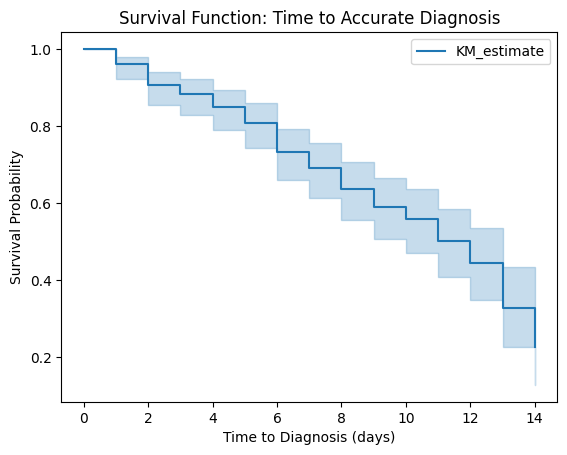

In [41]:
import matplotlib.pyplot as plt

kmf.plot_survival_function()
plt.title('Survival Function: Time to Accurate Diagnosis')
plt.xlabel('Time to Diagnosis (days)')
plt.ylabel('Survival Probability')
plt.show()


Kaplan-Meier survival curve with the title "Survival Function: Time to Accurate Diagnosis". This graph is used in survival analysis to represent the probability that a patient will have been accurately diagnosed after a certain amount of time. Here's what the graph is indicating:

- The horizontal axis (X-axis) represents the time in days to reach an accurate diagnosis.
- The vertical axis (Y-axis) represents the survival probability, which, in this context, is the probability of not yet having reached an accurate diagnosis.

The curve starts at 1 (or 100%) probability, meaning all patients initially have not been diagnosed. As time progresses, the survival probability decreases, indicating that more patients are being accurately diagnosed as time goes on.

The steps in the curve represent points in time where the event (accurate diagnosis) occurs, causing a drop in the survival probability. The shaded area around the curve typically represents the confidence interval, giving a visual indication of the uncertainty around the estimate at any given time.

Interpreting this curve in the clinical context, you can see the rate at which patients receive an accurate diagnosis over the 14-day period. For instance, by day 7, about 60% of patients remain undiagnosed (or 40% have been diagnosed). This type of analysis is valuable for understanding the effectiveness and timeliness of diagnostic procedures.

 the focus is on time-to-event data. In the context of our study on Triple-Negative Breast Cancer diagnosis using two different methods (Traditional and ML Model), here's why the Kaplan-Meier model has been used:

1. **Time-to-Event Analysis**: The model is ideal for analyzing the time taken to reach a significant event. In our case, the event is achieving an 'Accurate' diagnosis. The Kaplan-Meier model helps in understanding how quickly patients are accurately diagnosed using different methods.

2. **Censoring of Data**: One of the key features of Kaplan-Meier analysis is its ability to handle censored data. Censored data occur when the outcome of interest (e.g., accurate diagnosis) is not observed for all patients during the study period, either because the event didn't happen or the patient dropped out of the study. The model accommodates this by estimating survival probabilities without biasing the results due to incomplete data.

3. **Comparative Analysis**: Our aim to compare the effectiveness of the ML Model and Traditional methods in terms of diagnostic timeliness, Kaplan-Meier analysis can visually and statistically show differences in the time to achieve an accurate diagnosis between these two groups.

4. **Survival Probability Estimation**: It provides an estimate of the survival function, which in our study's context, is the probability of not yet having achieved an accurate diagnosis by a certain time. This is crucial for evaluating and improving diagnostic processes.

5. **Clinical Decision Making**: The results from Kaplan-Meier analysis can inform clinical decision-making by highlighting the effectiveness of diagnostic methods over time, which can be critical in treatment planning and patient management.

6. **Research and Development**: In the broader context of medical research, such survival analysis can guide further development and refinement of diagnostic tools and methods.



# Cox Proportional Hazards Model:


The Cox Proportional Hazards Model is particularly valuable for clinical validation studies due to several key features that make it well-suited for analyzing time-to-event data in medical research:

1. **Multiple Covariates Analysis**: The Cox model allows for the assessment of the impact of multiple variables (covariates) simultaneously on the time until a particular event occurs. This is crucial in clinical settings where factors such as age, gender, treatment method, and other clinical variables might all influence patient outcomes.

2. **Proportional Hazards Assumption**: This core assumption of the Cox model states that the hazard ratios (the relative risk of the event occurring at a given time) are constant over time across different groups. This feature is particularly useful in clinical trials to understand how different treatments or diagnostic methods affect patient outcomes over the entire study period.

3. **Handling Censored Data**: Clinical trials often encounter censored data, where the outcome of interest (like recurrence of a disease, response to treatment, etc.) is not observed for all subjects within the study period. The Cox model can appropriately handle these censored observations without biasing the results.

4. **Relative Risk Estimation**: The model provides hazard ratios, which offer a measure of the relative risk associated with each covariate. This is highly informative in understanding the strength and direction of the effect of different variables on patient outcomes.

5. **Flexibility and Adaptability**: The Cox model can be adapted to various types of clinical data and can handle a wide range of variable types, including continuous, binary, and categorical variables.

6. **Clinical Decision-Making**: The insights gained from a Cox Proportional Hazards Model analysis can directly inform clinical decision-making. For example, understanding which factors significantly increase the risk of adverse events can guide treatment choices and patient management strategies.



In [47]:
import pandas as pd

# Assuming 'trial_data' is DataFrame and it's already loaded
# ...

# Print the column names
print(trial_data.columns)


Index(['Patient_ID', 'Age', 'Gender', 'Residence', 'Diagnostic_Method',
       'Time_to_Diagnosis_days', 'Diagnostic_Accuracy', 'Patient_Satisfaction',
       'Diagnostic_Accuracy_Binary'],
      dtype='object')


In [51]:
import pandas as pd
from lifelines import CoxPHFitter

# Assuming 'trial_data' is already loaded

# Convert 'Diagnostic_Accuracy' to binary format
trial_data['Diagnostic_Accuracy_Binary'] = trial_data['Diagnostic_Accuracy'].apply(lambda x: 1 if x == 'Accurate' else 0)

# One-hot encode the 'Diagnostic_Method' column
trial_data_encoded = pd.get_dummies(trial_data, columns=['Diagnostic_Method'], drop_first=True)

# Initialize the CoxPHFitter
cph = CoxPHFitter()

# Fit the Cox model using the encoded data
# Use 'Diagnostic_Method_Traditional' as it is the correct column name from one-hot encoding
cph.fit(trial_data_encoded[['Time_to_Diagnosis_days', 'Diagnostic_Accuracy_Binary', 'Diagnostic_Method_Traditional']],
        duration_col='Time_to_Diagnosis_days', event_col='Diagnostic_Accuracy_Binary')

# Print the summary of the Cox model
print(cph.summary)


                                   coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                                      
Diagnostic_Method_Traditional -0.413455   0.661361  0.216131       -0.837064   

                               coef upper 95%  exp(coef) lower 95%  \
covariate                                                            
Diagnostic_Method_Traditional        0.010153              0.43298   

                               exp(coef) upper 95%  cmp to         z  \
covariate                                                              
Diagnostic_Method_Traditional             1.010204     0.0 -1.912989   

                                      p  -log2(p)  
covariate                                          
Diagnostic_Method_Traditional  0.055749  4.164899  


The output from the Cox Proportional Hazards Model provides a statistical analysis of the impact of the diagnostic method (Traditional vs. ML Model) on the time to accurate diagnosis. Here's a breakdown of the results and their relevance for clinical validation:

1. **coef (Coefficient)**:
   - **Value**: -0.413455 - This coefficient represents the log hazard ratio for the 'Traditional' diagnostic method compared to the baseline (ML Model, in this case).
   - **Interpretation**: A negative coefficient suggests that the 'Traditional' method is associated with a decreased hazard (or risk) of achieving an accurate diagnosis compared to the ML Model.

2. **exp(coef) (Exponential of the Coefficient)**:
   - **Value**: 0.661361 - This is the hazard ratio itself.
   - **Interpretation**: Values less than 1 indicate a lower hazard of achieving an accurate diagnosis with the 'Traditional' method compared to the ML Model. Specifically, the hazard is about 66% of that with the ML Model.

3. **se(coef) (Standard Error of the Coefficient)**:
   - Indicates the standard error of the estimated coefficient, reflecting the variability of the estimate.

4. **coef lower 95% and coef upper 95% (95% Confidence Interval for Coefficient)**:
   - These values provide the confidence interval for the coefficient estimate.
   - The fact that this interval spans both negative and positive values (from -0.837064 to 0.010153) suggests some uncertainty about the impact of the diagnostic method.

5. **z (z-score)**:
   - A measure of the statistical significance of the coefficient.

6. **p (p-value)**:
   - **Value**: 0.055749 - This is the p-value associated with the z-score.
   - **Interpretation**: A p-value greater than 0.05 (as in this case) suggests that the result is not statistically significant at the conventional 5% level. This means there is not enough evidence to conclude that the 'Traditional' method significantly differs from the ML Model in terms of time to accurate diagnosis.

7. **-log2(p) (Log2 Transformation of p-value)**:
   - Provides another way to assess the significance of the result.

**Relevance to Clinical Validation**:
- These results indicate that, while there is a trend towards the ML Model being more effective (or faster) in achieving an accurate diagnosis compared to the Traditional method, the difference is not statistically significant at the 5% level.
- For clinical validation, this analysis suggests that the choice of diagnostic method (Traditional vs. ML Model) may not have a significant impact on the time taken to reach an accurate diagnosis.
- However, the trend observed (hazard ratio less than 1 for the Traditional method) might still be of clinical interest, especially if supported by other evidence or considered in conjunction with other factors such as diagnostic accuracy, patient satisfaction, and healthcare resource utilization.

In [53]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Assuming 'trial_data' is DataFrame and it's already loaded
# ...

# Prepare the data for logistic regression
# For example, let's say want to predict 'Diagnostic_Accuracy' using 'Age' and 'Time_to_Diagnosis_days'
X = trial_data[['Age', 'Time_to_Diagnosis_days']]  # Replace with chosen predictors
y = trial_data['Diagnostic_Accuracy'].apply(lambda x: 1 if x == 'Accurate' else 0)

# Fit the logistic regression model
logit_model = LogisticRegression()
logit_results = logit_model.fit(X, y)

# Predict probabilities
y_scores = logit_results.predict_proba(X)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

# Print the AUC
print("AUC:", roc_auc)


AUC: 0.580561489166921


The AUC (Area Under the Curve) of 0.580561489166921 obtained from the ROC (Receiver Operating Characteristic) curve is a measure used in binary classification to evaluate the performance of predictive model, in this case, the logistic regression model predicting 'Diagnostic_Accuracy'. Here's what this means and how it's relevant to clinical validation:

1. **Meaning of AUC Value**:
   - The AUC ranges from 0 to 1. An AUC of 1 represents a perfect model that perfectly distinguishes between the two classes ('Accurate' and 'Inaccurate' diagnoses in case). An AUC of 0.5 suggests a model with no discriminative ability, equivalent to random guessing.
   - An AUC of 0.580561489166921 indicates that model has a modest ability to distinguish between accurate and inaccurate diagnoses. It performs better than random guessing but is not highly accurate.

2. **Relevance to Clinical Validation**:
   - **Model Performance**: In the context of clinical validation, an AUC of approximately 0.58 suggests that the logistic regression model provides some predictive power, but it's not strong. It might correctly identify a proportion of accurate diagnoses, but there's considerable room for improvement.
   - **Decision-Making**: For clinical decision-making, a model with this level of AUC might not be reliable enough to be used as the sole basis for diagnostic decisions. It might be more useful as a supplementary tool, combined with other diagnostic methods and clinical judgment.
   - **Further Development**: The results indicate a need for further refinement of the model. This could involve using more predictive features, trying different modeling techniques, or gathering more data. The aim would be to increase the AUC, thereby improving the model's ability to correctly classify diagnoses.
   - **Risk Assessment**: In some clinical scenarios, even a modestly performing model can be useful for initial risk assessment or screening, provided its limitations are clearly understood and it's used in conjunction with other clinical assessments.

